**Author:** Kaetlyn Gibson

**Bio 399**
    
**Homework 6**

## Question 1:
The time to fixation of an allele is defined as the number of generations that it takes to go from frequency 1/2𝑁 to 1.0. Using the drift2() function that we wrote in the week6 notebook we are going to use simulations to derive the relationship between time to fixation and population size. Using a population size of 𝑁 = 10, 50, 100, 500, start replicate populations off with an allele at frequency 1/2𝑁, as if it were a new allele, and run them for long enough that alleles go to fixation or loss. Then summarize how many generations it takes for fixation to occur.  Be sure to ignore loss of the allele.  Plot that simulated average fixation time versus population size. Write a sentence or two explaining what you observe.

In [1]:
# import statments
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def drift2(N, p0, gens, reps):
    """ drift2 from week6 notebook """
    p = np.full((gens, reps), 0.0) #initialize
    p[0,:] = p0
    for i in range(1,gens):
        p_N = np.array([np.random.binomial(N,x) for x in p[i-1,:]])
        p[i,:] = p_N/ N
    return(p)

# def fixTime(N, p0, gens, reps):
#     """ 
#     a variant of drift2 that calculates generations 
#     where the frequency < 1 for each replicate population
#     (time it takes until fixation)
#     """
#     p = np.full((gens, reps), 0.0) #initialize
#     p[0,:] = p0
#     result = [0] * reps
#     for i in range(1,gens):
#         p_N = np.array([np.random.binomial(N,x) for x in p[i-1,:]])
#         p[i,:] = p_N/ N
#         print(f"generation: {i}")
#         for j in range(reps):
#             print(f"=>replicate population {j}, result: {p[i][j]}")
#             if p[i][j] == 0:
#                 print(f"=>=> LOSS at gen {i} in replicate population {j}!")
#                 result[j] = 0
#             elif p[i][j] > 0 and p[i][j] < 1:
#                 result[j] += 1
#             elif p[i][j] == 1:
#                 print(f"=>=> FIXATION at gen {i} in replicate population {j}!")
#         print(f"results for generation {j}: {result}")
                
#     print(f"result array: {result}")

def fixGens(N, p0, gens, reps):
    """ 
    a variant of drift2 that calculates # generations 
    where the frequency < 1 for each replicate population
    (time it takes until fixation)
    * no extra print statements *
    """
    p = np.full((gens, reps), 0.0) #initialize
    p[0,:] = p0
    result = [0] * reps
    for i in range(1,gens):
        p_N = np.array([np.random.binomial(N,x) for x in p[i-1,:]])
        p[i,:] = p_N/ N
        for j in range(reps):  # for each replica population
            if p[i][j] == 0:  # loss
                result[j] = 0  # set to 0 so we ignore it 
            elif p[i][j] > 0 and p[i][j] < 1:  # if it's not loss nor fixation
                result[j] += 1  # it took another gen, so +1
            # else: 
                # fixation occurred and we don't need to do anything
#     print(f"result array: {result}")
    return result

def avgFixTime(N, p0, gens, reps):
    """ 
    compute avg time for fixation across the 
    replicate populations that reached fixation (ignoring loss)
    """
    fixArray = fixGens(N, p0, gens, reps)
    fixCount = 0
    fixTime = 0
    for i in range(reps):
        if fixArray[i] != 0: # ignoring loss populations
            fixCount += 1  # counting populations that reached fixation
            # total num generations took for all populations that reached fixation
            fixTime += fixArray[i] + 1  # added 1 to include the generation where it hits fixation  
    avg = np.round(fixTime / fixCount)  # round to whole number
    avg2 = fixTime / fixCount  # round to whole number
#     print(f"avg fixation time: {avg} generations")
#     print(f"non-rounded avg fixation time: {avg2} generations")
    return avg
        

I chose gens = 5000 so it should hopefully have enough generations to test through

In [3]:
print(f"N = 10: {avgFixTime(10, 0.5, 5000, 10)}")
print(f"N = 50: {avgFixTime(50, 0.5, 5000, 10)}")
print(f"N = 100: {avgFixTime(100, 0.5, 5000, 10)}")
print(f"N = 500: {avgFixTime(500, 0.5, 5000, 10)}")

N = 10: 28.0
N = 50: 70.0
N = 100: 107.0
N = 500: 476.0


In [4]:
nDict = {}
for n in range(10, 510, 10):
    nDict[n] = avgFixTime(n, 0.5, 5000, 10)   
print(nDict)

{10: 11.0, 20: 33.0, 30: 33.0, 40: 25.0, 50: 106.0, 60: 68.0, 70: 72.0, 80: 110.0, 90: 244.0, 100: 128.0, 110: 95.0, 120: 127.0, 130: 196.0, 140: 351.0, 150: 244.0, 160: 312.0, 170: 219.0, 180: 386.0, 190: 148.0, 200: 285.0, 210: 269.0, 220: 478.0, 230: 232.0, 240: 177.0, 250: 221.0, 260: 240.0, 270: 124.0, 280: 426.0, 290: 357.0, 300: 871.0, 310: 517.0, 320: 409.0, 330: 651.0, 340: 372.0, 350: 339.0, 360: 635.0, 370: 584.0, 380: 638.0, 390: 840.0, 400: 610.0, 410: 591.0, 420: 787.0, 430: 261.0, 440: 717.0, 450: 402.0, 460: 388.0, 470: 320.0, 480: 490.0, 490: 1282.0, 500: 673.0}


I just wanted a larger data set for my graph. :)

Text(0.5, 0, 'Population Size')

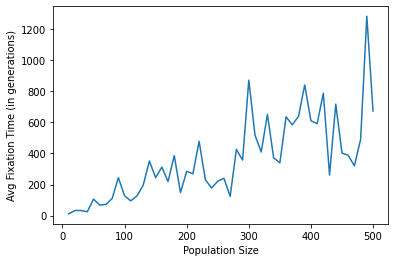

In [5]:
# Make a plot of the average fixation time across replicate populations versus population size:
plt.plot(*zip(*sorted(nDict.items())))
plt.ylabel("Avg Fixation Time (in generations)")
plt.xlabel("Population Size")

Nice. Looks like as population size increases, the avg time (in generations) it takes to reach fixation increases as well.

## Question 2:
Do exactly the same thing as above, computing the time to fixation, but now use the selectionPlusDrift()function from that same note-book.   For this exercise, hold 𝑁 constant at 𝑁 = 500 and vary selection against the 𝐴2 allele by using the following three vectors of selection coefficients: 𝑤 = [1, 0.99, 0.98], [1, 0.98, 0.96], [1, 0.95, 0.9]. Write a few sentences about what you notice and produce a plot of fixation time vs selection coefficient against the 𝐴2 allele, that is 𝑠 = 1 − 𝑤22.

In [6]:
def wbar(p, w_vec):
    """
    compute the mean fitness from vector of geno fitnesses
    and p the current allele freq
    """
    q = 1 - p
    wbar = (p**2 * w_vec[0]) + (2 * p * q * w_vec[1]) + (q**2 * w_vec[2])
    return(wbar)

def p_prime(p, w_vec):
    wb = wbar(p, w_vec)
    p_p = (p**2 * w_vec[0]) + (p * (1 - p) * w_vec[1])
    return(p_p / wb)

def selection(N, p0, w_vec, gens, reps):
    p = np.full((gens, reps), 0.0) #initialize
    p[0,:] = p0
    # renormalize w_vec just in case
    max_val = np.max(w_vec)
    w_vec = [x / max_val for x in w_vec]
    # main loop
    for i in range(1,gens):
        pp = np.array([p_prime(x, w_vec) for x in p[i-1,:]])
        p[i,:] = pp
    return(p)

In [7]:
def selectionPlusDrift(N, p0, w_vec, gens, reps):
    p = np.full((gens, reps), 0.0) #initialize
    p[0,:] = p0
    # renormalize w_vec just in case
    max_val = np.max(w_vec)
    w_vec = [x / max_val for x in w_vec]
    # main loop
    for i in range(1,gens):
        pp = np.array([p_prime(x, w_vec) for x in p[i-1,:]]) # selection 
        p_N = np.array([np.random.binomial(N,x) for x in pp]) # now drift
        p[i,:] = p_N / N # divide by popn size to get freqs
    return(p)

def selectionPlusDrift_fixGens(N, p0, w_vec, gens, reps):
    """ 
    a variant of selectionPlusDrift that calculates 
    # generations where the frequency < 1 for each
    replicate population (time it takes until fixation)
    """
    p = np.full((gens, reps), 0.0) #initialize
    p[0,:] = p0
    result = [0] * reps
    # renormalize w_vec just in case
    max_val = np.max(w_vec)
    w_vec = [x / max_val for x in w_vec]
    # main loop
    for i in range(1,gens):
        pp = np.array([p_prime(x, w_vec) for x in p[i-1,:]]) # selection 
        p_N = np.array([np.random.binomial(N,x) for x in pp]) # now drift
        p[i,:] = p_N / N # divide by popn size to get freqs
        for j in range(reps):  # for each replica population
            if p[i][j] == 0:  # loss
                result[j] = 0  # set to 0 so we ignore it 
            elif p[i][j] > 0 and p[i][j] < 1:  # if it's not loss nor fixation
                result[j] += 1  # it took another gen, so +1
            # else: 
                # fixation occurred and we don't need to do anything
    return result

def selectionPlusDrift_avgFixTime(N, p0, w_vec, gens, reps):
    """ 
    compute avg time for fixation across the 
    replicate populations that reached fixation (ignoring loss)
    """
    fixArray = selectionPlusDrift_fixGens(N, p0, w_vec, gens, reps)
    fixCount = 0
    fixTime = 0
    for i in range(reps):
        if fixArray[i] != 0: # ignoring loss populations
            fixCount += 1  # counting populations that reached fixation
            # total num generations took for all populations that reached fixation
            fixTime += fixArray[i] + 1  # added 1 to include the generation where it hits fixation  
    avg = np.round(fixTime / fixCount)  # round to whole number
    avg2 = fixTime / fixCount  # round to whole number
#     print(f"avg fixation time: {avg} generations")
#     print(f"non-rounded avg fixation time: {avg2} generations")
    return avg

Again, choosing gens = 2000 to hopefully have enough generations to test through without erroring

In [8]:
w1 = [1, 0.99, 0.98]
w2 = [1, 0.98, 0.96]
w3 = [1, 0.95, 0.9]
print(f"w = {w1}: {selectionPlusDrift_avgFixTime(500,0.5,w1,2000,10)}")
print(f"w = {w2}: {selectionPlusDrift_avgFixTime(500,0.5,w2,2000,10)}")
print(f"w = {w3}: {selectionPlusDrift_avgFixTime(500,0.5,w3,2000,10)}")

w = [1, 0.99, 0.98]: 267.0
w = [1, 0.98, 0.96]: 205.0
w = [1, 0.95, 0.9]: 83.0


Wow, the avg fixation time is decreasing! 

**Make a plot of the average fixation time across replicate populations vs selection coefficient against the 𝐴2 allele, that is 𝑠 = 1 − $𝑤_{22}$:**

Okay, I'm guessing since we are selecting against the A2 allele above, and since
$$
\bar{w} = p^2w_{11} + 2pqw_{12} + q^2w_{22}
$$
then $𝑤_{22}$ is shown as w_vec[2] in w_bar. Which means our $𝑤_{22}$ should be the third number in each of our w_vecs (makes sense). So our s = (1-0.98), (1-0.96), and (1-0.9).

In [15]:
wDict = {
    0.01: 0,
    0.02: 0,
    0.10: 0}
for w in wDict.keys():
    wDict[w] = selectionPlusDrift_avgFixTime(500,0.5,w1,2000,10)  
print(wDict)

{0.01: 421.0, 0.02: 306.0, 0.1: 286.0}


Text(0.5, 0, 's = 1 - w₂₂')

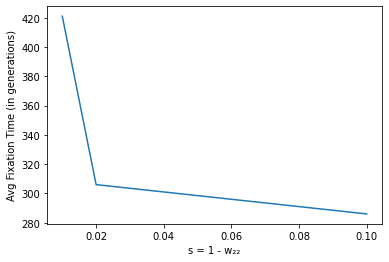

In [16]:
# plot
plt.plot(*zip(*sorted(wDict.items())))
plt.ylabel("Avg Fixation Time (in generations)")
plt.xlabel("s = 1 - w\N{SUBSCRIPT TWO}\N{SUBSCRIPT TWO}")

Nice. Looks like the number of generations it's taking for fixation to occur is dropping the more we select against the A2 allele.